# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [1]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# add more imports here if you like
# ...

import re
from datetime import date
from scipy.stats import ttest_ind
import math

In [2]:
# if you use Google Colab:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# change this line your folder where the data is found
#basedir = '/content/drive/MyDrive/data'
basedir = 'data'
os.listdir(basedir)

['listings.csv', 'reviews.csv']

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [4]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [5]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
#df.head()

## Question 1a

In [6]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.

def drop_cols(df):
# ...
    to_drop = ['scrape_id','last_scraped','description','listing_url',\
    'neighbourhood','calendar_last_scraped', 'amenities',\
    'neighborhood_overview', 'picture_url','host_url',\
    'host_about', 'host_location','host_total_listings_count',\
    'host_thumbnail_url','host_picture_url', 'host_verifications',\
    'bathrooms_text','has_availability','minimum_minimum_nights',\
    'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',\
    'minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d',\
    'calculated_host_listings_count','calculated_host_listings_count_entire_homes',\
    'calculated_host_listings_count_private_rooms',\
    'calculated_host_listings_count_shared_rooms']
    
    df.drop(to_drop, inplace = True, axis = 1)

    return df

In [7]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [8]:
def drop_cols_na(df, threshold = 0.5):
# ...
    df.dropna(axis='columns', how='any', thresh= threshold, subset=None, inplace=True)

    return df

In [9]:
df = drop_cols_na(df)

## Question 1b

In [10]:
def binary_encoding(df):
    
    #boolean_cols = ['host_is_superhost', 'host_identity_verified',\
    #'has_availability', 'instant_bookable']
    
    boolean_cols = ['host_is_superhost', 'host_identity_verified', 'instant_bookable']
    
    for i in boolean_cols:
        
        df[i] = df[i].replace(to_replace = 't', value = 1)
        df[i] = df[i].replace(to_replace = 'f', value = 0)

    return df

In [11]:
df = binary_encoding(df)

In [12]:
# hint: check Pandas to_datetime method
# use column "host_since"

def add_host_days(df):
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['host_days'] = (pd.to_datetime('today') - df['host_since']).apply(lambda x: x.days)
    
    return df

In [13]:
def convert_price(df):

    df['price'] = df['price'].apply(lambda x: float( x.replace('$','').replace(',','') ) )
    
    return df

In [14]:
df = add_host_days(df)
df = convert_price(df)

## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [15]:
# How many hosts offer 2 or more properties for rent?

df_q1 = df.groupby('host_id')['id'].count()

len(df_q1[df_q1.values >= 2])


1331

In [16]:
# What is the highest price for a listing?

max(df['price'])


8000.0

In [17]:
# What is the ID of the listing that has the largest number of bedrooms?

df.iloc[df['bedrooms'].idxmax()]['id']

46015289

In [18]:
# What is the ID of the listing with the largest advertised price

df.iloc[df['price'].idxmax()]['id']

258273

In [19]:
# There are different room types. How many listings are there for the most common room type?

# df.groupby('room_type')['id'].count().sort_values(ascending = False)
df.groupby('room_type')['id'].count().max()

14433

In [20]:
# How many hosts are there that have been registered for more than 3000 days?

len(df[df['host_days'] > 3000]['host_id'].unique())

2313

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

Text(0.5, 1.0, 'Average price per neighbourhood')

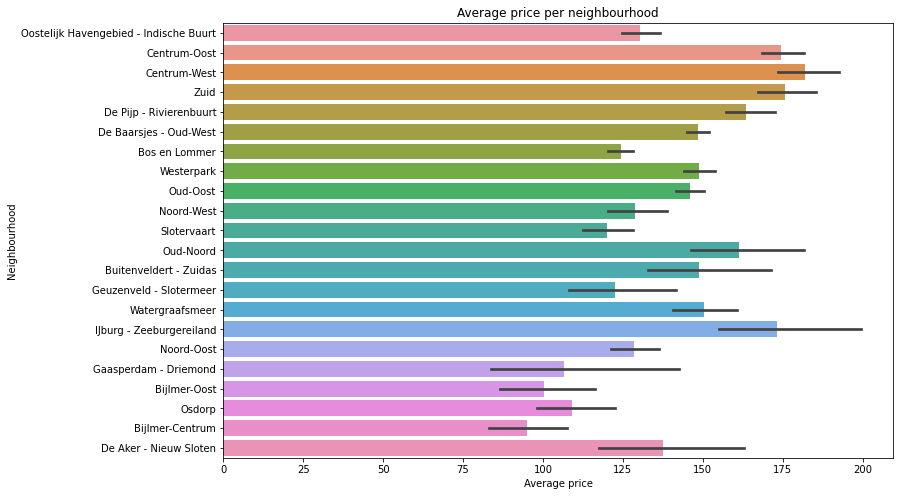

In [21]:
# your code...
# Horizontal barplot

fig, ax = plt.subplots(figsize=(12, 8))

bar = sns.barplot(data = df, y = 'neighbourhood_cleansed', x = 'price', estimator = np.mean)

#ax.set_xticklabels(set(df.neighbourhood_cleansed), rotation = 90)

plt.xlabel('Average price')
plt.ylabel('Neighbourhood')
plt.title('Average price per neighbourhood')

Plot a correlation matrix as instructed in the Coursework proforma:

C:\Users\c21015647\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:>

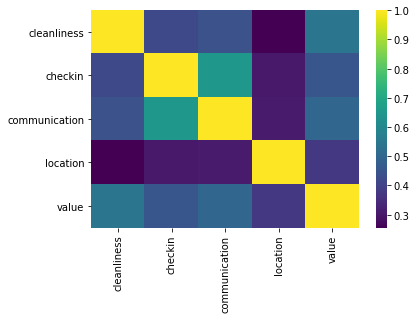

In [22]:
# your code...


# Prepare dataframe to plot

df_plot_2 = df[['review_scores_cleanliness', 
                'review_scores_checkin', 
                'review_scores_communication', 
                'review_scores_location', 
                'review_scores_value']]

renamed_columns = { i : i.split('_')[2] for i in df_plot_2.columns}

df_plot_2.rename(columns= renamed_columns, inplace = True)


# Correlation matrix and heatmap

C = df_plot_2.corr()

sns.heatmap(C, cmap="viridis")


Plot a geographical distribution as instructed in the Coursework proforma:

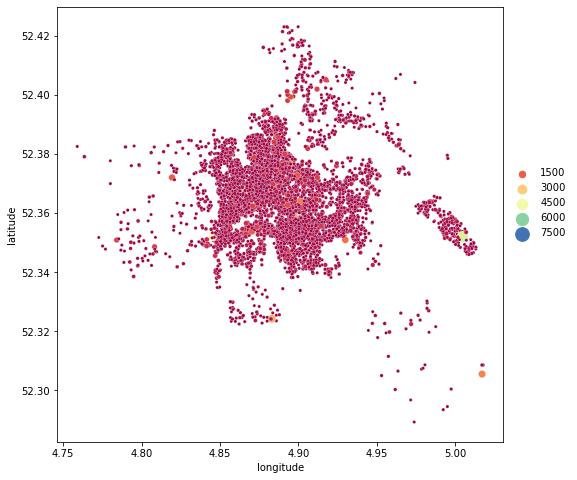

In [14]:
# your code...

df_plot_3 = df[df['price']>150][['price', 'latitude', 'longitude']]



fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=df_plot_3, x="longitude", y="latitude", hue = "price", size="price", palette="Spectral", sizes=(10, 200))

plt.legend(bbox_to_anchor=(1, 0.65), frameon = False)


---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [42]:
# your linear regression code...

df_2a = df[['review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness', 
            'review_scores_checkin', 
            'review_scores_communication', 
            'review_scores_location', 
            'review_scores_value']]

renamed_columns_2a = { i : i.split('_')[2] for i in df_2a.columns}

df_2a.rename(columns= renamed_columns_2a, inplace = True)


fit_2a = sm.OLS.from_formula('rating ~ accuracy + cleanliness + checkin + communication + location + value', df_2a).fit()
print(fit_2a.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     7008.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        20:27:53   Log-Likelihood:                -42957.
No. Observations:               15880   AIC:                         8.593e+04
Df Residuals:                   15873   BIC:                         8.598e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3169      0.550     -0.577

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): ...[double click to edit]...

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): ...
Need to change the significance level to alpha/num_of_hypothesis


In [43]:
# your t-test code...

def RoomTypeTtest(a, b, i_df = df, i_column = 'price', i_category = 'room_type'):
    
    '''
    Given a dataframe (df), returns the p.value generated from a t-test involving two different categories for a certain column
    
    
    a, b : Categories to be compared
    
    i_df : Dataframe containing source data
    
    i_column : Column containing all values to feed the t-test, from mixed categories
    
    i_category : Column containing all category values from each df entry
    
    
    '''
    
    return ttest_ind(i_df[i_df[i_category] == a][i_column], i_df[i_df[i_category] == b][i_column]).pvalue


room_types = df['room_type'].unique()
df_pval = pd.DataFrame(data = [], columns = room_types, index = room_types) # Creates an empty matrix to place t-test results

for col in df_pval.columns:
    #df_pval[col] = [ttest_ind(df[df['room_type'] == col]['price'], df[df['room_type'] == x]['price']).pvalue for x in df_pval.columns]
    df_pval[col] = [RoomTypeTtest(col, x) if (col != x) else None for x in df_pval.columns]

In [44]:
df_pval

,Private room,Entire home/apt,Hotel room,Shared room
Private room,NaN,3.624982e-184,0.000060,0.451693
Entire home/apt,3.624982e-184,NaN,0.002929,0.002177
Hotel room,5.966552e-05,2.929221e-03,NaN,0.312119
Shared room,4.516929e-01,2.176832e-03,0.312119,NaN


In [45]:
df_pval[df_pval<0.01]

,Private room,Entire home/apt,Hotel room,Shared room
Private room,NaN,3.624982e-184,0.000060,NaN
Entire home/apt,3.624982e-184,NaN,0.002929,0.002177
Hotel room,5.966552e-05,2.929221e-03,NaN,NaN
Shared room,NaN,2.176832e-03,NaN,NaN


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...

In this question you investigate how well nightly price can be predicted from the other 
variables in the dataframe. You need to decide yourself which variables to choose, but make 
sure you have at least 10 variables. The only requirement is that you use room_type as a 
predictor. Because room_type is a categorical variable, you first have to use dummy coding 
to turn it into a number of binary variables (hint: pd.get_dummies()). In the notebook, 
provide a short explanation for your choice of variables.
Starting from the variables you have chosen, our goal is to derive a sparse model with fewer 
variables. This process is called variable selection. In variable selection (‘variable’ means the 
same as ‘predictor’), variables get iteratively added or removed from the regression model. 
Once finished, the model typically contains only a subset of the original variables. It makes it 
easier to interpret the model, and in some cases it makes it generalise better to new data. To 
perform variable selection, implement a function variable_selection(df, predictors, target, alpha)
where df is the listings dataframe, predictors is a list with your initial selection of at least 
10 variables (e.g. [‘bedrooms’, ‘beds’, …]), target is the target variable for the regression 
(e.g. ‘price’), and alpha is the significance level for selecting significant predictors (e.g. 
0.05). The function returns pred, the selected subset of the original predictors.
To calculate regression fits and p-values you can use statsmodels. Your approach operates 
in two stages: In stage 1, you build a model by adding variables one after the other. You keep 
adding variables that increase the adjusted R2
coefficient. You do not need to calculate it by 
hand, it is provided by statsmodels package. In stage 2, starting from these variables, if any 
of them are not significant, you keep removing variables until all variables in the model are 
significant. The output of the second stage is your final set of variables. Let us look at the two 
stages in detail:


Stage 1 (add variables) [8 marks]
• Start with an empty set of variables
• Fit multiple one-variable regression models. In each iteration, use one of the variables 
provided in predictors. The variable that leads to the largest increase in adjusted R2
is added to the model.
• Now proceed by adding a second variable into the model. Starting from the remaining 
variables, again choose the variable that leads to the largest increase in adjusted R2
. 
• Continue in the same way for the third, fourth, … variable.
• You are finished when there is no variable left that increases adjusted R2
.


Stage 2 (remove non-significant variables) [7 marks]
It is possible that some of the variables from the previous stage are not significant. We call a 
variable "significant" if the p-value of its coefficient is smaller or equal to the given 
threshold alpha.
• Start by fitting a model using the variables that have been added to the model in Stage 1.
• If there is a variable that is not significant, remove the variable with the largest p-value 
and fit the model again with the reduced set of variables.
• Keep removing variables and re-fitting the model until all remaining variables are 
significant.
• The remaining significant variables are the output of your function.
To solve this question, provide corresponding code in Question 2b in the notebook and 
provide a short answer in the space following YOUR ANSWER. To test your function, add a 
function call with your selection of predictors and alpha level.

In [56]:
# your code...

# GET DUMMIES

for col in pd.get_dummies(df.room_type).columns:
    colname = col.replace(' ','_').replace('/','_')
    df[colname] = pd.get_dummies(df.room_type)[col]
    

In [57]:
# your code...

def variable_selection(df, predictors, target, alpha):
    
    
    # STAGE 1
    
    
    # This list collects successful candidates that increase the Rsquare value, from PREDICTORS.
    vars = ['Entire_home_apt', 'Hotel_room', 'Private_room', 'Shared_room']
    
    # Copy PREDICTOR list to avoid deleteing predictors from the original input predictor list.
    candidates = predictors 
    
    
    '''
    GetRsquare(x)
    
    Lambda function to calculate the rsquare value. This is to make the code easier to read.
    Inhereited parameters from outter function: df, target
    
    x : List of predictors
    
    '''
    GetRsquare = lambda x : sm.OLS.from_formula(target + ' ~ ' + ' + '.join(x), df).fit().rsquared
    
    
    # Calculate initial rsquare value using the room_type predictor
    current_rsquare = GetRsquare(vars)
    
    
    while len(candidates) > 0:
         
        evaluations = [GetRsquare(vars + [candidate]) for candidate in candidates]
        
        max_rsquare_idx = evaluations.index(max(evaluations))
        
        best_candidate = candidates[max_rsquare_idx]
                    
        
        if GetRsquare(vars + [best_candidate]) > current_rsquare:

            vars.append(best_candidate)
            current_rsquare = GetRsquare(vars)
                     
        candidates.remove(best_candidate)

    print('candidates stage1: ', candidates)
    print('vars stage1: ', vars)
    
    
    # STAGE 2
    
    
    model = sm.OLS.from_formula(target + ' ~ ' + ' + '.join(vars), df).fit()
    pval_bool_check = [x > alpha for x in model.pvalues[1:]]
    
    print('model: ', model)
    print('boolcheck', pval_bool_check)
        
    while any(pval_bool_check):
    
        discarded = model.pvalues[1:][model.pvalues[1:] == max(model.pvalues[1:])].index[0]
        
        print('discarded: ', discarded)
        print('type discarded: ', type(discarded))
        
        vars.remove(discarded)
             
        model = sm.OLS.from_formula(target + ' ~ ' + ' + '.join(vars), df).fit()
        pval_bool_check = [x > alpha for x in model.pvalues]
    
    
    return vars
        

In [59]:
predictors = ['accommodates', 
            'bedrooms',
            'beds',
            'review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness', 
            'review_scores_checkin', 
            'review_scores_communication', 
            'review_scores_location', 
            'review_scores_value']


target = 'price'
alpha = 0.05

variable_selection(df, predictors, target, alpha)

candidates stage1:  []
vars stage1:  ['Entire_home_apt', 'Hotel_room', 'Private_room', 'Shared_room', 'accommodates', 'review_scores_location', 'bedrooms', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_rating', 'review_scores_checkin', 'review_scores_accuracy']
model:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D00A4D3408>
boolcheck [False, True, False, True, False, False, False, False, False, False, False, False, True]
discarded:  Hotel_room
type discarded:  <class 'str'>
discarded:  Entire_home_apt
type discarded:  <class 'str'>
discarded:  review_scores_accuracy
type discarded:  <class 'str'>
discarded:  review_scores_checkin
type discarded:  <class 'str'>


['Private_room',
 'Shared_room',
 'accommodates',
 'review_scores_location',
 'bedrooms',
 'review_scores_value',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_rating']

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

There have been requests from customers to provide automated recommendations. First, guests requested a recommender system that helps them identifying neighbourhoods in a city that fit their budget. Second, hosts who want to offer new listings would like a recommender system that suggests a nightly price. As a response to this request, you and your team have worked out specifications for two recommender systems.


Recommender system 1: Recommend a neighbourhood given a budget [6 marks]

Guests who are traveling on a budget have been requesting a tool that allows them to quickly see which neighbourhood in a city offers most accommodation opportunities within their budget bracket. You want to implement a Python function that delivers this functionality. The plan is to integrate the Python function into the Airbnb website. After some deliberation, you work out that the function should meet these specifications:


• The user should be able to specify their budget bracket, that is, a minimum and maximum budget. For instance, a user might look for properties priced in the $10-$50 range. Another user looking for luxury accommodation may opt for a $100-$500 range.

• Your function identifies which neighbourhood has the largest number of properties within this range. It returns a string representing the name of the neighbourhood. Use the neighbourhood_cleansed variable for the names of the neighbourhoods.

• Some neighbourhoods have more properties than others, so by considering only absolute numbers neighbourhoods with more properties could always be preferred by your algorithm. An alternative is to consider relative numbers, that is, the proportion of listings within the budget bracket relative to the total number of listings within a given neighbourhood. The user should be able to select whether they want absolute or relative numbers.


From these specifications, you arrive at the following function signature:


recommend_neighbourhood(df, budget_min, budget_max, relative)


with df being your listings dataframe, the variables budget_min and budget_max being floating point numbers representing the budget bracket. The numbers are inclusive, i.e., a nightly price exactly equal to budget_min or budget_max is considered, too. The variable relative is a Boolean specifying whether relative numbers (fractions) should be considered in the recommendation. If False, absolute numbers are considered instead. 


In [159]:
# your code...

def recommend_neighbourhood(df, budget_min, budget_max, relative = False):
    
    # Filter the df according to given budget, also keep columns of interest
    df_budget = df[ (df['price'] > budget_min) & (df['price'] < budget_max) ][['id', 'neighbourhood_cleansed']]
    
    # Calculate number of properties per neighbourhood
    df_budget = df_budget.groupby('neighbourhood_cleansed').count().reset_index().sort_values(by=['id'], ascending = False)
    
    # Rename calculated column
    df_budget = df_budget.rename(columns={"id": "properties_budget"})
    
    
    
    if relative:
        
        # Keep columns of interest
        df_all_properties = df[['id', 'neighbourhood_cleansed']]
        
        # Calculate number of properties per neighbourhood
        df_all_properties = df_all_properties.groupby('neighbourhood_cleansed').count().reset_index().sort_values(by=['id'], ascending = False)
        
        # Rename calculated column
        df_all_properties = df_all_properties.rename(columns={"id": "all_properties"})
        
        
        # We use pd.merge method because we have reset the index during groupby operation, therefore we specify column to join:
        
        df_join = pd.merge(df_all_properties, df_budget, on='neighbourhood_cleansed')
        #df_join = df_all_properties.join(df_budget, how='inner') # If we don't reset the index, we can use .join instead ('neighbourhood_cleansed' woul be the index)
              
            
        # Calculate the relative number of available properties based on the above
        df_join['ratio'] = df_join['properties_budget']/df_join['all_properties']
        
        
        # DEBUGGING
        print('df_budget INDEX: ', df_budget.index)
        print('df_budget: ', df_budget.head())
        
        print('df_all_properties INDEX: ', df_all_properties.index)
        print('df_all_properties: ', df_all_properties.head())
        
        print('df_join: INDEX', df_join.index)
        print('df_join: ', df_join.head())
        
        
        
        # return df_join[df_join['ratio'] == max(df_join['ratio'])].index[0]
        return df_join.loc[df_join['ratio'].idxmax(), 'neighbourhood_cleansed']
    
    
    print('df_budget INDEX: ', df_budget.index)
    print('df_budget: ', df_budget.head())
    
    
    # return df_budget[df_budget['properties_budget'] == max(df_budget['properties_budget'])].index[0]
    return df_budget.loc[df_budget['properties_budget'].idxmax(),'neighbourhood_cleansed'] 
        
    
    
recommend_neighbourhood(df, 50, 200, relative = False)   
    

df_budget INDEX:  Int64Index([7, 8, 5, 20, 4, 17, 21, 2, 14, 16, 19, 18, 11, 13, 12, 3, 10, 6,
            15, 9, 0, 1],
           dtype='int64')
df_budget:       neighbourhood_cleansed  properties_budget
7    De Baarsjes - Oud-West               2382
8   De Pijp - Rivierenbuurt               1671
5              Centrum-West               1353
20               Westerpark               1097
4              Centrum-Oost               1076


'De Baarsjes - Oud-West'

### Price recommender for hosts


Recommender system 2: Price recommender for hosts [6 marks]

If a new host wants to offer their room / flat / house on Airbnb, they need to decide on what the nightly price will be. There is no official guidance but hosts have been requesting for Airbnb to provide an algorithm. After some deliberation, you work out that the function should meet these specifications:


• The user has to provide the geolocation (latitude and longitude) of their property.

• Your algorithm searches for the geographically closest properties (simply measured by Euclidean distance in terms of latitude/longitude) that are already listed on Airbnb. Your price recommendation will be the mean of the nightly prices of these closeby properties.

• The user should be able to set the number of closeby properties (called neighbours) that are considered. A larger number of neighbours indicates a larger geographical area.

• You can ignore the fact that some neighbours could be in a different neighbourhood.
Nightly prices are quite different for different room types. The user should be able to set the desired room type. If the room type is defined, only properties of the respective room type are taken into consideration.


From these specifications, you arrive at the following function signature:


recommend_price(df, latitude, longitude, n_neighbours, room_type)


with the variables being latitude and longitude representing geolocation of the property, n_neighbours the number of neighbouring properties the user wants to take into account. room_type, if specified, restricts the neighbours search to properties of the given room type; it should default to None which means that any property type is considered.
To test your two recommendation system, provide function calls for each of the two functions. You can freely select the parameters of the function call.


To solve this question, provide corresponding code in Question 2c in the notebook.

In [180]:
# your code...

def recommend_price(df, latitude, longitude, n_neighbours, room_type = None):
    
    # Keep columns of interest only
    df = df[['room_type', 'price', 'latitude', 'longitude']]


    # Initial filter should a room_type be specified. Only executes when room_type is True after bool() evaluation
    
    if bool(room_type):

        df = df[df['room_type'] == room_type]

    
    print(df)
    # We combine latitude and longitude as a list into a new column
    
    df['location'] = list(zip(df['latitude'], df['longitude']))
    
    
    def euclidean_distance(x, y = [latitude, longitude]):
        return math.sqrt(sum(pow(a-b,2) for a,b in zip(x,y)))
    
    # Calculate Euclidean Distance
    df['distance'] = df['location'].apply(euclidean_distance)
    
    
    neighbours = df.sort_values(by=['distance'], ascending = True)[:n_neighbours]
    
    
    return neighbours['price'].mean()
    


# Euclidean Distance formula calculation idea obtained from the site bigdata-madesimple. Consulted in may 2021:
# https://bigdata-madesimple.com/implementing-the-five-most-popular-similarity-measures-in-python/
    

In [179]:
recommend_price(df, 50, 5, 7)#, room_type = 'Private room')

RangeIndex(start=0, stop=18522, step=1)
             room_type  price  latitude  longitude
0         Private room   59.0  52.36575    4.94142
1         Private room  236.0  52.36509    4.89354
2      Entire home/apt  125.0  52.37297    4.88339
3         Private room  135.0  52.38761    4.89188
4         Private room   75.0  52.36610    4.88953
...                ...    ...       ...        ...
18517  Entire home/apt  330.0  52.36978    4.91443
18518  Entire home/apt  350.0  52.36404    4.87967
18519  Entire home/apt   60.0  52.34071    4.90854
18520     Private room   67.0  52.36003    4.89317
18521     Private room   96.0  52.37701    4.91797

[18522 rows x 4 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


89.14285714285714